In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the stock data from CSV file
data = pd.read_csv('TATAELXSI.NS.csv', index_col='Date', parse_dates=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-16,780.000000,792.150024,775.549988,779.650024,725.041016,432856
2017-05-17,780.775024,787.500000,775.525024,781.099976,726.389404,358328
2017-05-18,777.500000,797.000000,769.775024,777.325012,722.878845,1034258
2017-05-19,782.500000,790.000000,768.549988,775.625000,721.297852,414042
2017-05-22,781.000000,782.500000,761.700012,764.025024,710.510376,280524


In [3]:
# Checking if the index is pandas datetime index
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [4]:
# Number of trading days
data['Close'].count()

1235

In [5]:
# Maximum close price in the given period
max_close_price = data['Close'].max()
max_close_price

9035.5

In [6]:
# Date at which the maximum price was reached
data[data['Close'] == max_close_price].index

DatetimeIndex(['2022-03-28'], dtype='datetime64[ns]', name='Date', freq=None)

In [7]:
# Computing the daily percent change in the closing prices
data['Daily_Percentage_Change'] = data['Close'].pct_change() * 100

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Percentage_Change
Date,,,,,,,
2017-05-16,780.000000,792.150024,775.549988,779.650024,725.041016,432856,NaN
2017-05-17,780.775024,787.500000,775.525024,781.099976,726.389404,358328,0.185975
2017-05-18,777.500000,797.000000,769.775024,777.325012,722.878845,1034258,-0.483288
2017-05-19,782.500000,790.000000,768.549988,775.625000,721.297852,414042,-0.218700
2017-05-22,781.000000,782.500000,761.700012,764.025024,710.510376,280524,-1.495565


In [9]:
# Removing the NaN value from the data
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Percentage_Change
Date,,,,,,,
2017-05-17,780.775024,787.500000,775.525024,781.099976,726.389404,358328,0.185975
2017-05-18,777.500000,797.000000,769.775024,777.325012,722.878845,1034258,-0.483288
2017-05-19,782.500000,790.000000,768.549988,775.625000,721.297852,414042,-0.218700
2017-05-22,781.000000,782.500000,761.700012,764.025024,710.510376,280524,-1.495565
2017-05-23,766.799988,766.799988,721.000000,727.700012,676.729675,460232,-4.754427


In [10]:
# Filter the data when Daily_Percentage_Change is greater the 1.0
data_filter = data[data['Daily_Percentage_Change'] > 1.0]
data_filter.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Percentage_Change
Date,,,,,,,
2017-05-26,666.049988,685.474976,665.974976,681.250000,633.533264,596068,2.451310
2017-05-31,656.250000,671.025024,656.250000,667.125000,620.397522,312420,1.695884
2017-06-01,669.500000,693.500000,665.000000,686.299988,638.229370,672002,2.874272
2017-06-05,675.750000,762.000000,675.750000,746.099976,693.840881,3963182,10.028020
2017-06-06,752.549988,798.400024,748.674988,770.575012,716.601563,5856284,3.280396


In [11]:
# Computing 20 Day Simple Moving Average
sma_20 = 20
data['SMA_20'] = data['Close'].rolling(window = sma_20).mean()
data.head(25)

,Open,High,Low,Close,Adj Close,Volume,Daily_Percentage_Change,SMA_20
Date,,,,,,,,
2017-05-17,780.775024,787.500000,775.525024,781.099976,726.389404,358328,0.185975,NaN
2017-05-18,777.500000,797.000000,769.775024,777.325012,722.878845,1034258,-0.483288,NaN
2017-05-19,782.500000,790.000000,768.549988,775.625000,721.297852,414042,-0.218700,NaN
2017-05-22,781.000000,782.500000,761.700012,764.025024,710.510376,280524,-1.495565,NaN
2017-05-23,766.799988,766.799988,721.000000,727.700012,676.729675,460232,-4.754427,NaN
2017-05-24,720.500000,725.000000,641.174988,664.625000,618.072632,1518740,-8.667722,NaN
2017-05-25,663.625000,674.375000,655.125000,664.950012,618.374878,858642,0.048902,NaN
2017-05-26,666.049988,685.474976,665.974976,681.250000,633.533264,596068,2.451310,NaN
2017-05-29,682.474976,682.900024,662.150024,666.875000,620.165039,336714,-2.110092,NaN


In [12]:
# Computing 5 Day Average Volume Indicator
avg_vol = 5
data['Avg_Vol_5D'] = data['Volume'].rolling(window=avg_vol).mean()
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,Daily_Percentage_Change,SMA_20,Avg_Vol_5D
Date,,,,,,,,,
2017-05-17,780.775024,787.500000,775.525024,781.099976,726.389404,358328,0.185975,NaN,NaN
2017-05-18,777.500000,797.000000,769.775024,777.325012,722.878845,1034258,-0.483288,NaN,NaN
2017-05-19,782.500000,790.000000,768.549988,775.625000,721.297852,414042,-0.218700,NaN,NaN
2017-05-22,781.000000,782.500000,761.700012,764.025024,710.510376,280524,-1.495565,NaN,NaN
2017-05-23,766.799988,766.799988,721.000000,727.700012,676.729675,460232,-4.754427,NaN,509476.8
2017-05-24,720.500000,725.000000,641.174988,664.625000,618.072632,1518740,-8.667722,NaN,741559.2
2017-05-25,663.625000,674.375000,655.125000,664.950012,618.374878,858642,0.048902,NaN,706436.0
2017-05-26,666.049988,685.474976,665.974976,681.250000,633.533264,596068,2.451310,NaN,742841.2
2017-05-29,682.474976,682.900024,662.150024,666.875000,620.165039,336714,-2.110092,NaN,754079.2


<AxesSubplot:xlabel='Date'>

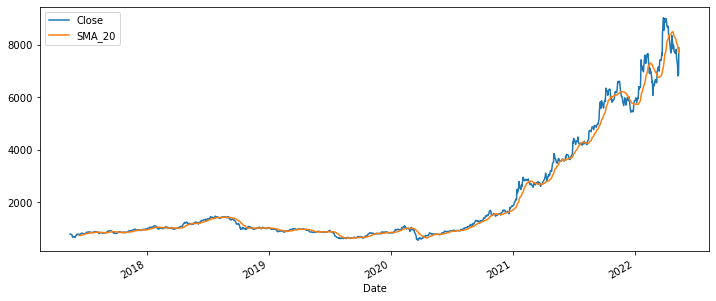

In [13]:
# Plotting the stock data with 20 SMA for the given period
data[['Close', 'SMA_20']].plot(figsize=(12,5))

In [14]:
# Total Percentage Simple Returns during the given period.
round(data['Daily_Percentage_Change'].cumsum()[-1], ndigits=3)

271.575

<AxesSubplot:xlabel='Date'>

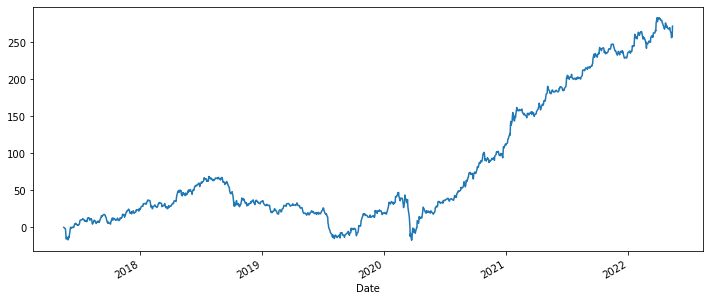

In [15]:
# Plotting the Simple Cumulative Returns of the stock over the given period
data['Daily_Percentage_Change'].cumsum().plot(figsize=(12,5))